In [1]:
# Import Necessary Modules.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix

import joblib
import pickle

In [2]:
# define dataset path
# kindly update this path before you run the code
file_path = r"C:\Users\admin\Downloads\Capstone Project\Project 1\Data\AnomaData.xlsx"

In [3]:
# Read dataset
df = pd.read_excel(file_path)
# Get the dataset size
print("Anomadata-rows:",df.shape[0]," columns:", df.shape[1])

Anomadata-rows: 18398  columns: 62


In [4]:
# view the first 5 rows       
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [5]:
# Get info on column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [6]:
# Summary statistic for numerical columns
df.describe()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,1999-05-15 01:20:42.728557312,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
min,1999-05-01 00:00:00,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,1999-05-08 03:36:30,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,1999-05-14 18:39:00,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,1999-05-22 06:01:30,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1999-05-29 00:06:00,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000
std,NaN,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120


In [7]:
# Check for missing values
df.isnull().sum()

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

In [8]:
# Drop duplicates rows.
df.drop_duplicates(keep = False, inplace=True)

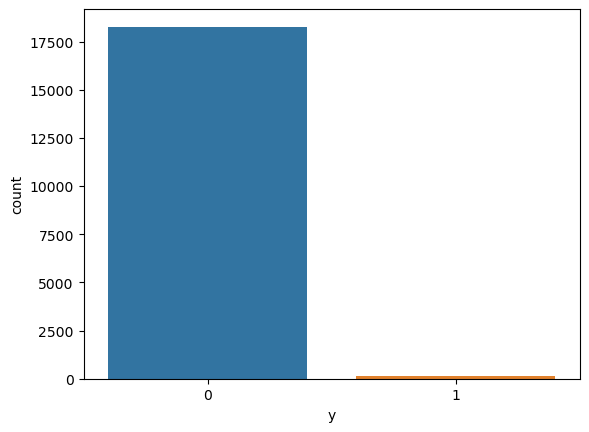

In [9]:
df.shape
sns.countplot(x='y',data=df)
plt.savefig('Countplot.png')
plt.show()

In [10]:
# Remove last duplicate cloumn
df.drop(columns = df.columns[-1], inplace = True)
df.columns

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60'],
      dtype='object')

In [11]:
# Try to get co-relation 
df.corr()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
time,1.000000,0.000741,0.094710,0.143395,-0.120243,0.425349,0.437453,0.222518,-0.118227,0.325096,...,-0.406533,-0.088100,-0.334488,0.215450,0.320491,-0.265503,-0.401512,-0.221929,-0.116790,-0.615400
y,0.000741,1.000000,0.010227,-0.090961,-0.116369,0.016792,-0.006161,-0.033487,0.018346,0.002983,...,-0.025812,0.007895,-0.041135,-0.041177,-0.013450,-0.024917,-0.017802,0.005083,0.009165,0.016083
x1,0.094710,0.010227,1.000000,0.137199,-0.057523,0.061614,0.046796,-0.120384,0.260254,0.337250,...,0.264131,0.487969,0.270655,-0.304403,0.037154,0.089789,0.323856,0.014921,0.472180,-0.114438
x2,0.143395,-0.090961,0.137199,1.000000,0.180331,-0.137783,0.035360,-0.029706,-0.058053,0.383303,...,0.097052,0.337809,0.111428,0.213488,0.300021,0.157117,0.007790,0.214721,0.341174,-0.129893
x3,-0.120243,-0.116369,-0.057523,0.180331,1.000000,-0.273556,-0.187914,0.011737,0.277747,0.203604,...,-0.045534,0.301978,-0.064739,0.514714,-0.015091,-0.014670,-0.057484,-0.406268,0.329741,0.113311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x56,-0.265503,-0.024917,0.089789,0.157117,-0.014670,-0.194464,-0.362978,0.490965,-0.116499,-0.195720,...,0.413847,-0.018978,0.421505,-0.084547,0.164676,1.000000,0.406422,0.149248,-0.024358,-0.107046
x57,-0.401512,-0.017802,0.323856,0.007790,-0.057484,-0.169534,-0.402099,-0.011936,0.102372,-0.114469,...,0.884623,0.068072,0.847152,-0.334670,0.194131,0.406422,1.000000,0.014729,0.073985,0.106532
x58,-0.221929,0.005083,0.014921,0.214721,-0.406268,-0.110220,0.050484,-0.204748,-0.323613,-0.133213,...,0.092531,-0.025328,0.102886,-0.272504,-0.106123,0.149248,0.014729,1.000000,-0.010551,0.108695
x59,-0.116790,0.009165,0.472180,0.341174,0.329741,-0.006763,-0.001526,-0.085573,0.377601,0.565666,...,0.068796,0.924882,0.068729,-0.057957,-0.041676,-0.024358,0.073985,-0.010551,1.000000,0.101891


In [12]:
# Seprate target from predcitors
y = df.y
X = df.drop(['y'], axis = 1)

In [13]:
# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8,test_size=0.2, random_state=0)

In [14]:
# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [15]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

In [16]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])

In [17]:
# Define the Model
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [23]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

In [30]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['x1', 'x2', 'x3', 'x4', 'x5',
                                                   'x6', 'x7', 'x8', 'x9',
                                                   'x10', 'x11', 'x12', 'x13',
                                                   'x14', 'x15', 'x16', 'x17',
                                                   'x18', 'x19', 'x20', 'x21',
                                                   'x22', 'x23', 'x24', 'x25',
                                                   'x26', 'x27', 'x28', 'x29',
                                                   'x30', ...])])),
                ('model', RandomForestRegressor(random_state=0))])

In [31]:
# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

In [34]:
# Dump trained model.
joblib.dump(my_pipeline, 'trained_model.pkl')

['trained_model.pkl']

In [33]:
# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 0.004891304347826087
